In [1]:
'''
Hello and Welcome to Kaggle, the online Data Science Community to learn, share, and compete. Most beginners get lost in the field, because they fall into the black box approach, using libraries and algorithms they don't understand. This tutorial will give you a 1-2-year head start over your peers, by providing a framework that teaches you how-to think like a data scientist vs what to think/code. Not only will you be able to submit your first competition, but you’ll be able to solve any problem thrown your way. I provide clear explanations, clean code, and plenty of links to resources. Please Note: This Kernel is still being improved. So check the Change Logs below for updates. Also, please be sure to upvote, fork, and comment and I'll continue to develop. Thanks, and may you have "statistically significant" luck!
'''
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
# %matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8
print('Python version:{}'.format(sys.version))
import pandas as pd

print("Pandas version:{}".format(pd.__version__))
import matplotlib

print('matplotlib.version {}'.format(matplotlib.__version__))

import numpy as np

print("Numpy version {}".format(np.__version__))

import scipy as sp

print("scipy version: {}".format(sp.__version__))

import IPython
from IPython import display

print("Ipython version :{} ".format(IPython.__version__))


Python version:3.8.0 (default, Nov  6 2019, 21:49:08) 
[GCC 7.3.0]
Pandas version:2.0.1
matplotlib.version 3.7.1
Numpy version 1.24.3
scipy version: 1.10.1
Ipython version :8.12.2 


In [2]:

import sklearn

print('Sklear version: {}'.format(sklearn.__version__))
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import random
import time

import warnings

warnings.filterwarnings('ignore')
print('-' * 25)
from subprocess import check_output

print(check_output(['ls', '../data/']))

import pandas as pd

data_raw = pd.read_csv('../data/train.csv')
data_val = pd.read_csv('../data/test.csv')
# #to play with our data we'll create a copy
# #remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]
print("2" * 100)
print(data_raw.info())
print(data_raw.head())
print(data_raw.sample(9))

Sklear version: 1.2.2
-------------------------
b'sample_submission_01.csv\nsample_submission.csv\ntest.csv\ntrain.csv\n'
2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 n

In [3]:

# Duplicates
import numpy as np

print("3" * 100)
print(
    f'Duplicates in train set :{data_raw.duplicated().sum()},'
    f'{np.round(100 * data_raw.duplicated().sum() / len(data_raw), 1)})')
print(
    f'Duplicates in test set :{data_raw.duplicated().sum()},'
    f'{np.round(100 * data_val.duplicated().sum() / len(data_raw), 1)})')

print('Train columns with null value:\n', data1.isnull().sum())
print("-" * 100)
print('Test/Validation columns with null value :\n', data_val.isnull().sum())
print("- " * 100)
print(data_raw.nunique())
print(data_raw.dtypes)

3333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
Duplicates in train set :0,0.0)
Duplicates in test set :0,0.0)
Train columns with null value:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------------------------------------------------------------------------------------------
Test/Validation columns with null value :
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

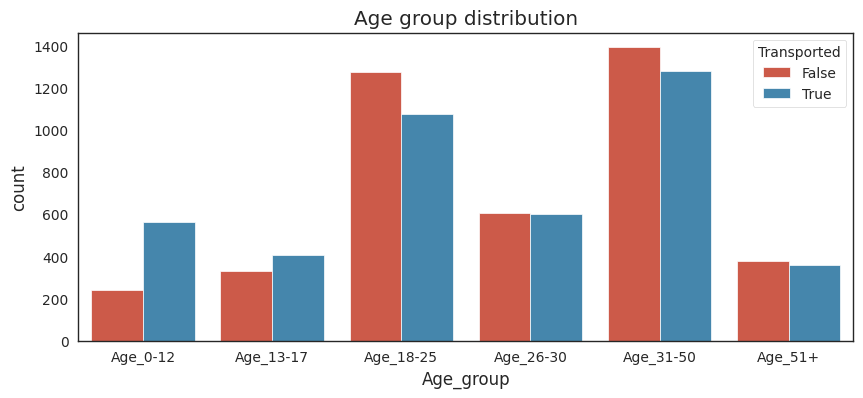

In [4]:

# Expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Categorical feature
cat_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
# Qualitative features
qual_feats = ['PassengerId', 'Cabin', 'Name']

for dataset in data_cleaner:
    dataset['Age_group'] = np.nan
    dataset.loc[dataset['Age'] <= 12, 'Age_group'] = 'Age_0-12'
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] < 18), 'Age_group'] = 'Age_13-17'
    dataset.loc[(dataset['Age'] >= 18) & (dataset['Age'] <= 25), 'Age_group'] = 'Age_18-25'
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age_group'] = 'Age_26-30'
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 50), 'Age_group'] = 'Age_31-50'
    dataset.loc[dataset['Age'] > 50, 'Age_group'] = 'Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10, 4))
g = sns.countplot(data=data1, x='Age_group', hue='Transported',
                  order=['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+'])
plt.title('Age group distribution')
plt.show()


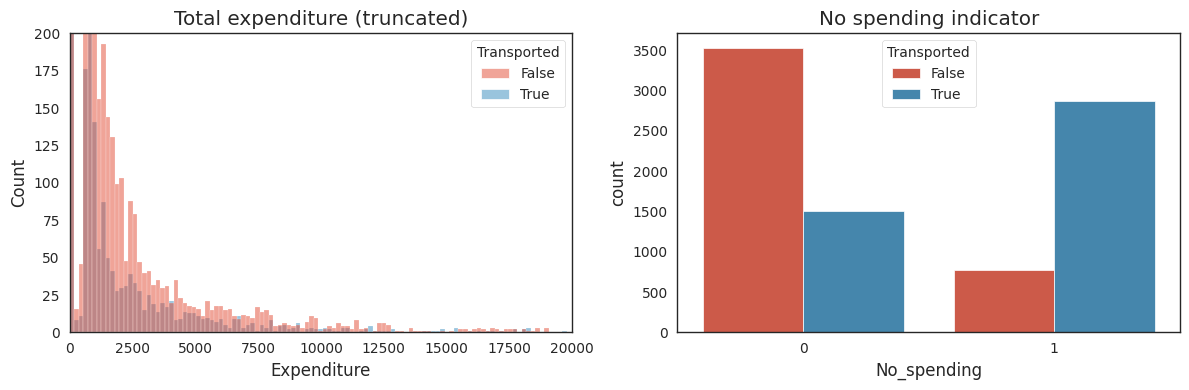

In [5]:

for dataset in data_cleaner:
    dataset['Expenditure'] = dataset[exp_feats].sum(axis=1)
    dataset['No_spending'] = (dataset['Expenditure'] == 0).astype(int)

# Plot distribution of new features
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=data1, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0, 200])
plt.xlim([0, 20000])

plt.subplot(1, 2, 2)
sns.countplot(data=data1, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()


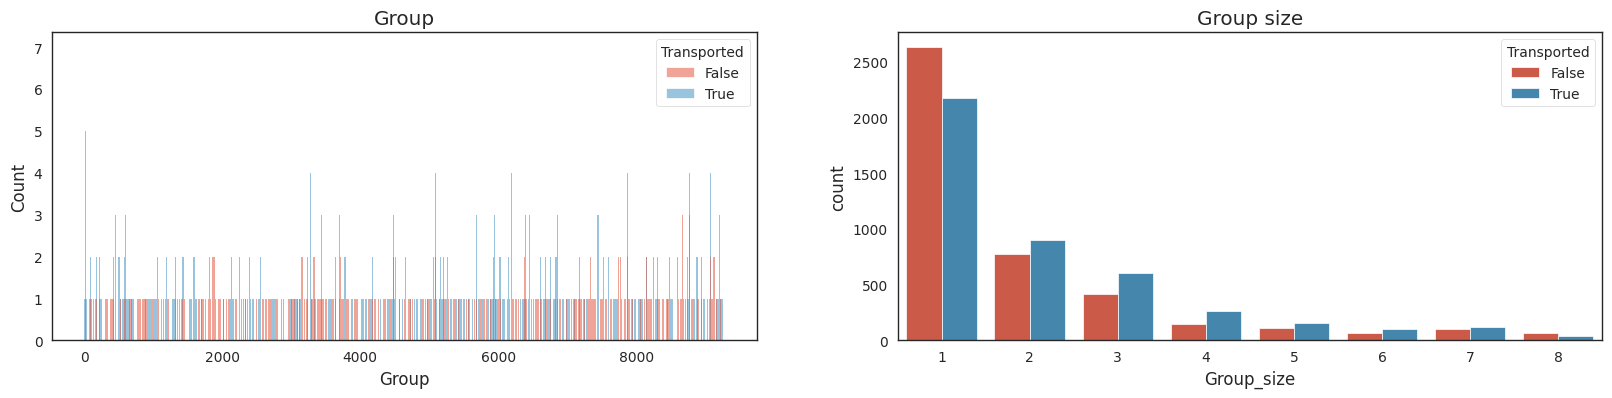

In [6]:
for dataset in data_cleaner:
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['Group_size'] = dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=data1, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=data1,x='Group_size',hue='Transported')
plt.title('Group size')
fig.tight_layout()
plt.show()


In [7]:
for dataset in data_cleaner:
    dataset['Solo'] = (dataset['Group_size'] == 1).astype(int)

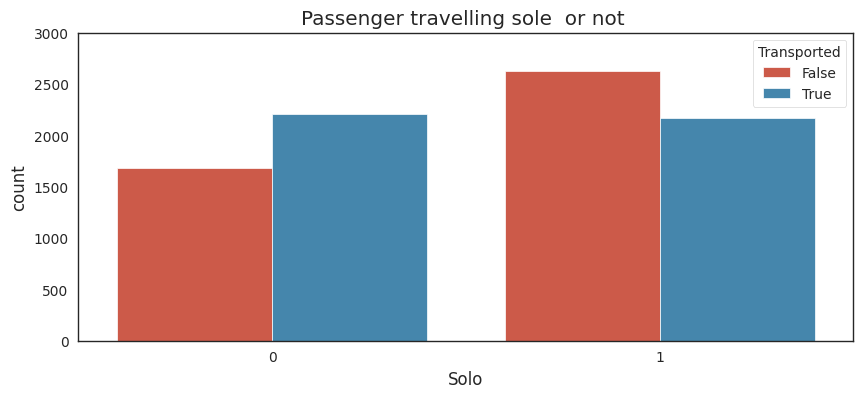

In [8]:
plt.figure(figsize=(10,4))
sns.countplot(data=data1,x='Solo',hue='Transported')
plt.title('Passenger travelling sole  or not ')
plt.ylim([0,3000])
plt.show()



In [9]:
for dataset in data_cleaner:
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)
    dataset[['Cabin_deck', 'Cabin_number', 'Cabin_side']] = dataset['Cabin'].str.split('/', expand=True)
    dataset['Cabin_number'] = dataset['Cabin_number'].astype(int)
    dataset.loc[dataset['Cabin_deck'] == 'Z', 'Cabin_deck'] = np.nan
    dataset.loc[dataset['Cabin_number'] == '9999', 'Cabin_number'] = np.nan
    dataset.loc[dataset['Cabin_side'] == 'Z', 'Cabin_side'] = np.nan

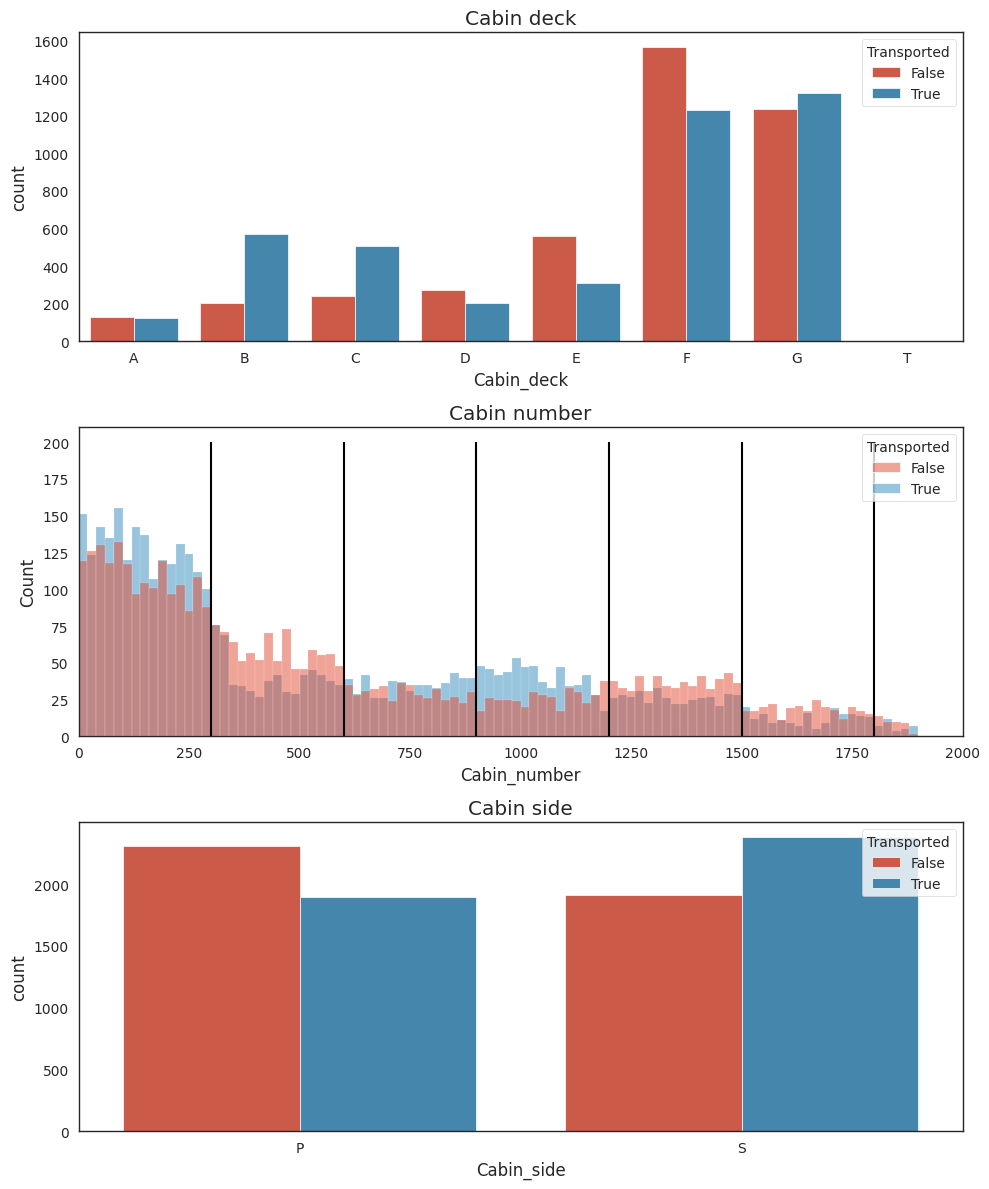

In [10]:

# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=data1, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=data1, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=data1, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

In [11]:
for dataset in data_cleaner:
    # New feature - training set
    dataset['Cabin_region1'] = (dataset['Cabin_number'] < 300).astype(int)
    dataset['Cabin_region2'] = ((dataset['Cabin_number'] >= 300) & (dataset['Cabin_number'] < 600)).astype(int)
    dataset['Cabin_region3'] = ((dataset['Cabin_number'] >= 600) & (dataset['Cabin_number'] < 900)).astype(int)
    dataset['Cabin_region4'] = ((dataset['Cabin_number'] >= 900) & (dataset['Cabin_number'] < 1200)).astype(int)
    dataset['Cabin_region5'] = ((dataset['Cabin_number'] >= 1200) & (dataset['Cabin_number'] < 1500)).astype(int)
    dataset['Cabin_region6'] = ((dataset['Cabin_number'] >= 1500) & (dataset['Cabin_number'] < 1500)).astype(int)
    dataset['Cabin_region7'] = (dataset['Cabin_number'] >= 1800).astype(int)


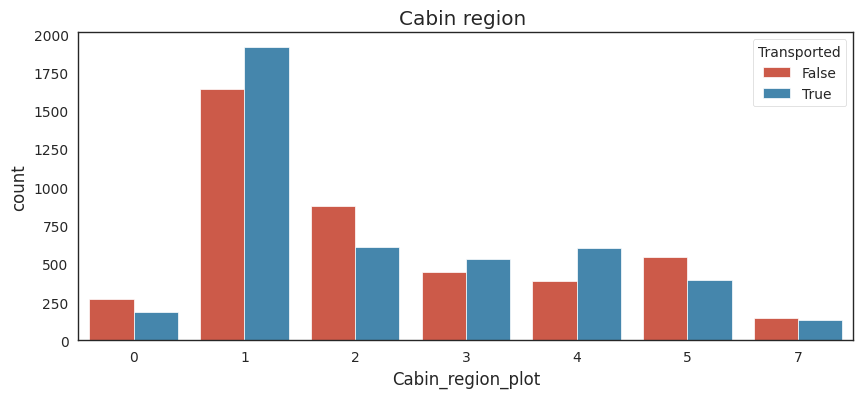

In [14]:
plt.figure(figsize=(10,4))
data1['Cabin_region_plot'] = (
            data1['Cabin_region1'] + 2 * data1['Cabin_region2'] + 3 * data1['Cabin_region3'] + 4 * data1[
        'Cabin_region4'] + 5 * data1['Cabin_region5'] + 6 * data1['Cabin_region6'] + 7 * data1['Cabin_region7']).astype(
    int)
sns.countplot(data=data1, x='Cabin_region_plot', hue='Transported')
plt.title('Cabin region ')
data1.drop('Cabin_region_plot', axis=1, inplace=True)


In [19]:
for dataset in data_cleaner:
    dataset['Name'].fillna('Unknown Unknown', inplace=True)
    dataset['Surname'] = dataset['Name'].str.split().str[-1]
    dataset['Family_size'] = dataset['Surname'].map(lambda x: dataset['Surname'].value_counts()[x])
    dataset.loc[dataset['Surname'] == 'Unknow Unknow'] = np.nan
    dataset.loc[dataset['Family_size'] > 100, 'Family_size'] = np.nan
    dataset.drop('Name', axis=1, inplace=True)


Text(0.5, 1.0, 'Family_size ')

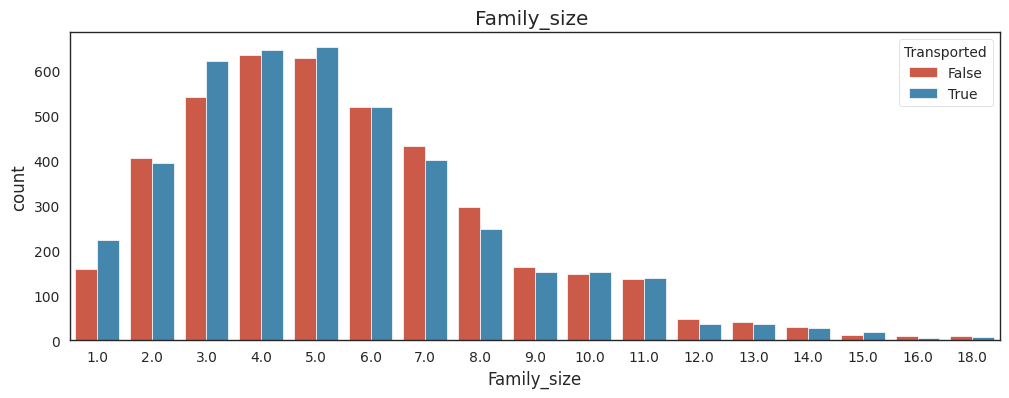

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(data=data1,x='Family_size',hue='Transported')
plt.title('Family_size ')

In [22]:
data1['Transported'].astype(int)
for dataset in data_cleaner:
    # Columns with missing values
    na_cols = dataset.columns[dataset.isna().any()].tolist()
    mv = pd.DataFrame(dataset[na_cols].isna().sum(), columns=['Number_missing'])
    mv['Percentage_missing'] = np.round(100 * mv['Number_missing'] / len(dataset), 2)
    print(mv,'\n')


              Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Age_group                179                2.06
Cabin_deck               199                2.29
Cabin_side               199                2.29
Family_size              200                2.30 

              Number_missing  Percentage_missing
HomePlanet                87                2.03
CryoSleep                 93                2.17
Destination               92                2.15
Age                       91                2.13
VIP               

In [24]:
dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Age_group', 'Expenditure', 'No_spending', 'Group', 'Group_size',
       'Solo', 'Cabin_deck', 'Cabin_number', 'Cabin_side', 'Cabin_region1',
       'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5',
       'Cabin_region6', 'Cabin_region7', 'Surname', 'Family_size'],
      dtype='object')